# Team13: Capstone project of Python Bootcamp

This is [the Capstone project for Team 13 of the Python Data Analysis Bootcamp](https://github.com/pyladiesams/Bootcamp-Data-Analysis-beginner-apr-may2020/blob/master/Capstone/README.md).
We are trying, more or less, to follow the structure of [jupytemplate](https://github.com/xtreamsrl/jupytemplate/blob/master/jupytemplate/jupytemplate/template.ipynb).

## Purpose

State the purpose of the notebook.

## Methology

Quickly describe assumptions and processing steps.

## TODO / Improvements

* [x] Find a dataset that has at least 2 CSV files
* [ ] Come up with 5 questions that you want to answer while exploring the dataset
* [ ] Perform EDA (Exploratoty Data Analysis) on your dataset with basic visualisations

## Results

## Setup

In [1]:
# install system dependencies
import sys
import os

!conda install -c conda-forge --yes --prefix {sys.prefix} pandas jupyterthemes seaborn jupyter_contrib_nbextensions pandoc

Solving environment: done

# All requested packages already installed.



### Library Import

In [2]:
# load libraries and setup environment
# mandatory
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# optional
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
from IPython.core.display import HTML
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Parameter definition

We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the other variables follow Python's guidelines.

In [3]:
COAST_COLUMN = "Coastline (coast/area ratio)"
COUNTRY_COLUMN = 'Country'
SATISFACTION_COLUMN = "People with highest life satisfaction [%]"

## Data import
We retrieve all the required data for the analysis.

In [4]:
cost_of_living = pd.read_csv('../data/andytran11996_cost-of-living/datasets_73059_162758_cost-of-living-2018.csv')

# we are droppping the Rank column because it's entirely empty
cost_of_living = cost_of_living.drop(columns = 'Rank')

life_satisfaction = pd.read_csv('../data/roshansharma_europe-datasets/datasets_231225_493692_life_satisfaction_2013.csv')
life_satisfaction = life_satisfaction.rename(columns = { "prct_life_satis_high": "People with highest life satisfaction [%]", "country": "Country" })
life_satisfaction['Country'] = life_satisfaction['Country'].astype(str)
life_satisfaction['Country'] = life_satisfaction['Country'].str.strip()

generic_country_data = pd.read_csv('../data/fernandol_countries-of-the-world/datasets_23752_30346_countries of the world.csv', decimal=',')
generic_country_data['Country'] = generic_country_data['Country'].astype(str)
generic_country_data['Country'] = generic_country_data['Country'].str.strip()
generic_european_country_data = generic_country_data[generic_country_data['Region'].str.contains('EUROPE', case = False)]

print('successfully imported the datasets.')

successfully imported the datasets.


## Data processing

### 1. What are the five cities with the highest/lowest cost of living (incl. rent)?

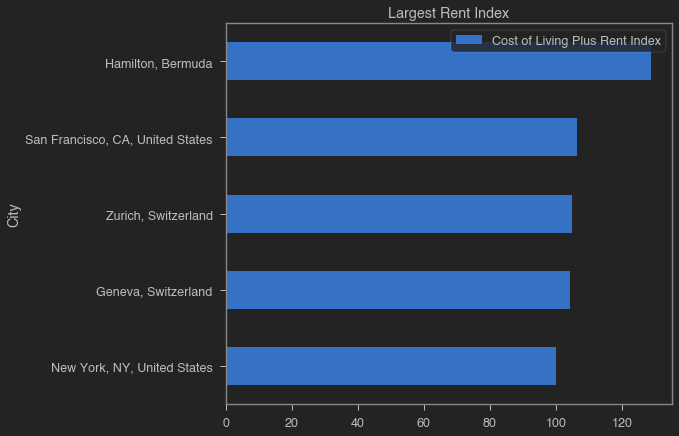

City,Cost of Living Plus Rent Index
"Hamilton, Bermuda",128.760000
"San Francisco, CA, United States",106.290000
"Zurich, Switzerland",105.030000
"Geneva, Switzerland",104.380000
"New York, NY, United States",100.000000


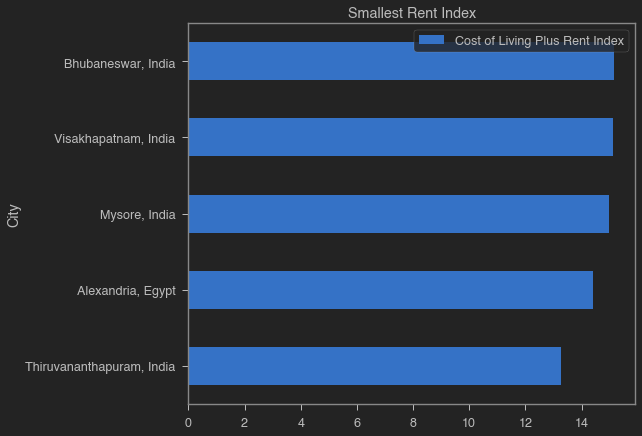

City,Cost of Living Plus Rent Index
"Bhubaneswar, India",15.140000
"Visakhapatnam, India",15.110000
"Mysore, India",14.980000
"Alexandria, Egypt",14.400000
"Thiruvananthapuram, India",13.260000


In [5]:
caption_column = 'City'
index_column = 'Cost of Living Plus Rent Index'

def display_cost_of_living(costs, title):
    filtered_costs = costs[[caption_column, index_column]].sort_values(index_column, ascending = True)
    filtered_costs.plot.barh(title = title, x = caption_column, y = index_column)
    plt.show();
    display(filtered_costs.sort_values(index_column, ascending = False).style.hide_index())

# print the ten most expensive cities in the database in 2018
display_cost_of_living(cost_of_living.nlargest(5, index_column), 'Largest Rent Index')
display_cost_of_living(cost_of_living.nsmallest(5, index_column), 'Smallest Rent Index')

## 2. What are the five happiest countries in Europe?

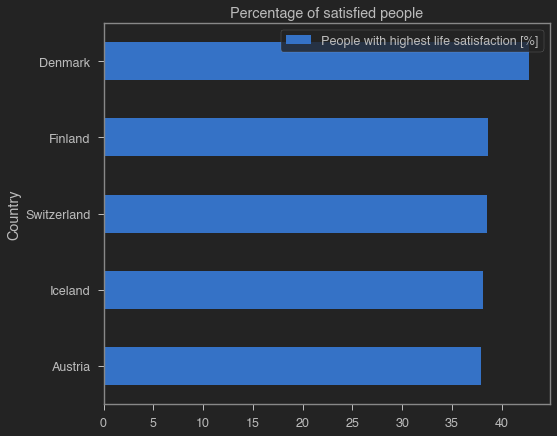

Country,People with highest life satisfaction [%]
Denmark,42.700000
Finland,38.600000
Switzerland,38.500000
Iceland,38.100000
Austria,37.900000


In [6]:
index_column = "People with highest life satisfaction [%]"
caption_column = 'Country'

top_countries_life_satisfaction = life_satisfaction[[caption_column, index_column]]
top_countries_life_satisfaction = top_countries_life_satisfaction.nlargest(5, index_column)
top_countries_life_satisfaction = top_countries_life_satisfaction.sort_values(index_column, ascending = True)
top_countries_life_satisfaction.plot.barh(title = 'Percentage of satisfied people', x = caption_column, y = index_column);
plt.show();
display(top_countries_life_satisfaction.sort_values(index_column, ascending = False).style.hide_index())

## 3. What are the European countries with the most coast line in relation to their area?

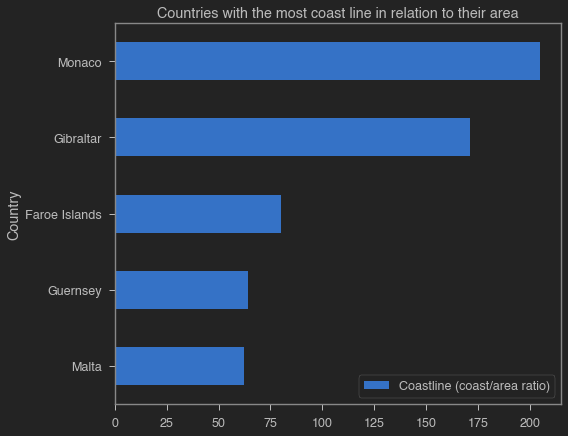

Country,Coastline (coast/area ratio)
Monaco,205.000000
Gibraltar,171.430000
Faroe Islands,79.840000
Guernsey,64.100000
Malta,62.280000


In [7]:
index_column = "Coastline (coast/area ratio)"
caption_column = 'Country'

coastline_data = generic_european_country_data[[caption_column, index_column]]

coastline_data = coastline_data.nlargest(5, index_column)
coastline_data = coastline_data.sort_values(index_column, ascending = True)
coastline_data.plot.barh(title = 'Countries with the most coast line in relation to their area', x = caption_column, y = index_column);
plt.show();
display(coastline_data.sort_values(index_column, ascending = False).style.hide_index())

## 4. Is there a correlation between happiness and access to a coastline?

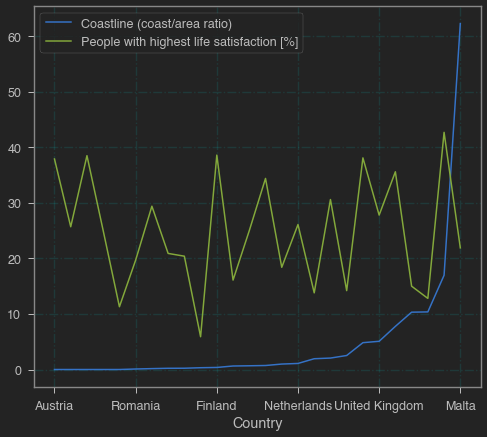

In [9]:
merged = pd.merge(generic_european_country_data, life_satisfaction, on = COUNTRY_COLUMN, how = 'inner')  

coastline_data = generic_european_country_data[[COAST_COLUMN, COUNTRY_COLUMN]]

# sort by coast
merged = merged.sort_values(COAST_COLUMN, ascending = True, ignore_index = True)

ax = plt.gca()
merged.plot(kind = 'line', y = COAST_COLUMN, x = COUNTRY_COLUMN ,ax=ax)
merged.plot(kind = 'line', y = SATISFACTION_COLUMN, x = COUNTRY_COLUMN ,ax=ax)

plt.grid(b = True, color = 'aqua', alpha = 0.1, linestyle = 'dashdot')
plt.show();

## References

* [data for the cost of living](https://www.kaggle.com/andytran11996/cost-of-living/)
* [base data for countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world)
* [data for life expectancy from the WHO](https://www.kaggle.com/kumarajarshi/life-expectancy-who)
* [roshansharma_europe-datasets](https://www.kaggle.com/roshansharma/europe-datasets)